# Building a Regression Model in Keras

## B. Normalize the data  

Repeat Part A **but use a normalized version of the data**. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

**How does the mean of the mean squared errors compare to that from Step A?**

As a reminder this was in the Part A:

>Use the Keras library to build a neural network with the following:

>- One hidden layer of 10 nodes, and a ReLU activation function

>- Use the adam optimizer and the mean squared error as the loss function.

>1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

>2. Train the model on the training data using 50 epochs.

>3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

>4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

>5. Report the mean and the standard deviation of the mean squared errors.

### Import libraries that are required for the solution

In [26]:
import keras
import pandas as pd
import numpy as np

# for building neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

# for splitting data using scikit-learn library
from sklearn.model_selection import train_test_split

# for evaluating the model with mean squared error function from scikit-learn
from sklearn.metrics import mean_squared_error

# for visualizing the mean squared errors with statistics
import matplotlib.pyplot as plt

import warnings

2025-02-27 10:29:50.764506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Read the data

In [30]:
filepath = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Split data into predictors and target

In [38]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
target = concrete_data['Strength']

In [88]:
n_cols = predictors.shape[1]

### B. Normalize the data

In [44]:
predictors_normalized = (predictors - predictors.mean())/ predictors.std()
predictors_normalized.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


#### Build Neural Network

Defining a function that defines our regression model for us so that we can conveniently call it to create our model. 

In [66]:
def regression_model():
    # Create a model with 10 hidden layers, ReLU activation function,
    #   use adam optimizer, and the mean squared error as loss function
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

### 1. Split the data to training and testing

Randomly splitting the data into a training and test sets by holding 30% of the data for testing using **train_test_split** function from the scikit-learn module.

<div class="alert alert-info"> 

  **Note:** We will be using the normalized data

</div> 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(predictors_normalized,target,test_size=0.3,random_state=42)

### 2. Train the model

Train the model on the training data using **50 epochs**.

In [90]:
# build the model
model = regression_model()
model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
23/23 - 1s - 25ms/step - loss: 1544.4882
Epoch 2/50
23/23 - 0s - 3ms/step - loss: 1529.4790
Epoch 3/50
23/23 - 0s - 3ms/step - loss: 1513.8710
Epoch 4/50
23/23 - 0s - 2ms/step - loss: 1497.2161
Epoch 5/50
23/23 - 0s - 2ms/step - loss: 1479.1143
Epoch 6/50
23/23 - 0s - 2ms/step - loss: 1459.8630
Epoch 7/50
23/23 - 0s - 2ms/step - loss: 1438.7537
Epoch 8/50
23/23 - 0s - 2ms/step - loss: 1416.4127
Epoch 9/50
23/23 - 0s - 2ms/step - loss: 1392.0924
Epoch 10/50
23/23 - 0s - 2ms/step - loss: 1366.6010
Epoch 11/50
23/23 - 0s - 2ms/step - loss: 1339.4696
Epoch 12/50
23/23 - 0s - 2ms/step - loss: 1310.7125
Epoch 13/50
23/23 - 0s - 2ms/step - loss: 1280.9518
Epoch 14/50
23/23 - 0s - 2ms/step - loss: 1249.3782
Epoch 15/50
23/23 - 0s - 2ms/step - loss: 1217.1370
Epoch 16/50
23/23 - 0s - 2ms/step - loss: 1182.6451
Epoch 17/50
23/23 - 0s - 2ms/step - loss: 1147.6115
Epoch 18/50
23/23 - 0s - 3ms/step - loss: 1110.8342
Epoch 19/50
23/23 - 0s - 2ms/step - loss: 1072.7842
Epoch 20/50
23/23 - 

### 3. Evaluate the Model on the test data

 Evaluating the model on the test data 

In [100]:
# Prediction
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


computing the mean squared error between the predicted concrete strength and the actual concrete strength using mean_squared_error function from Scikit-learn.

In [105]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error after testing the model: {mse}")

Mean Squared Error after testing the model: 235.76182409397398


### 4. Repeating the steps 1-3, 50 times

In [110]:
# Empty list for storing al MSE values
mse_normalized =[]

for i in range(50):
    print(f"Step # {i}")
    # 1. Randomly split the data by holding 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(predictors_normalized,target,test_size=0.3,random_state=42)

    # 2. Train the model for 50 epochs
    model = regression_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)

    predictions = model.predict(X_test)

    # 3. Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mse_normalized.append(mse)

print(mse_normalized)

Step # 0
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 4
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Step # 5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 6
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 9
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
Step # 10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 11
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 12
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 13
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 14
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 16
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 17
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 18
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 20

In [264]:
# Create a dataframe with the MSE scores
x_values = np.arange(len(mse_normalized))

df_normalized = pd.DataFrame({
    'iteration': x_values,
    'mse': mse_normalized
})

# Save to CSV
df_normalized.to_csv('neural_network_regression_normalized_mse.csv', index=False)

### 5. Reporting the mean and standard deviation of the mean squared errors

In [237]:
# Calculate the mean and standard deviation
mean_mse = np.mean(mse_normalized)
std_mse = np.std(mse_normalized)

# Print the values on screen
print(f"Mean of MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

Mean of MSE: 347.9859481570286
Standard Deviation of MSE: 94.15356142954823


For comparison, lets get the mean squared errors calculated from unnormalized data

In [239]:
df_mse_unnormalized = pd.read_csv('neural_network_regression_unnormalized_mse.csv')
mean_mse_unnormalized = df_mse_unnormalized['mse'].mean()
std_mse_unnormalized = df_mse_unnormalized['mse'].std(ddof=0)

print(f"Mean of MSE (unnormalized): {mean_mse_unnormalized}")
print(f"Standard Deviation of MSE (unnormalized): {std_mse_unnormalized}")

Mean of MSE (unnormalized): 518.462444944406
Standard Deviation of MSE (unnormalized): 581.1953007451983


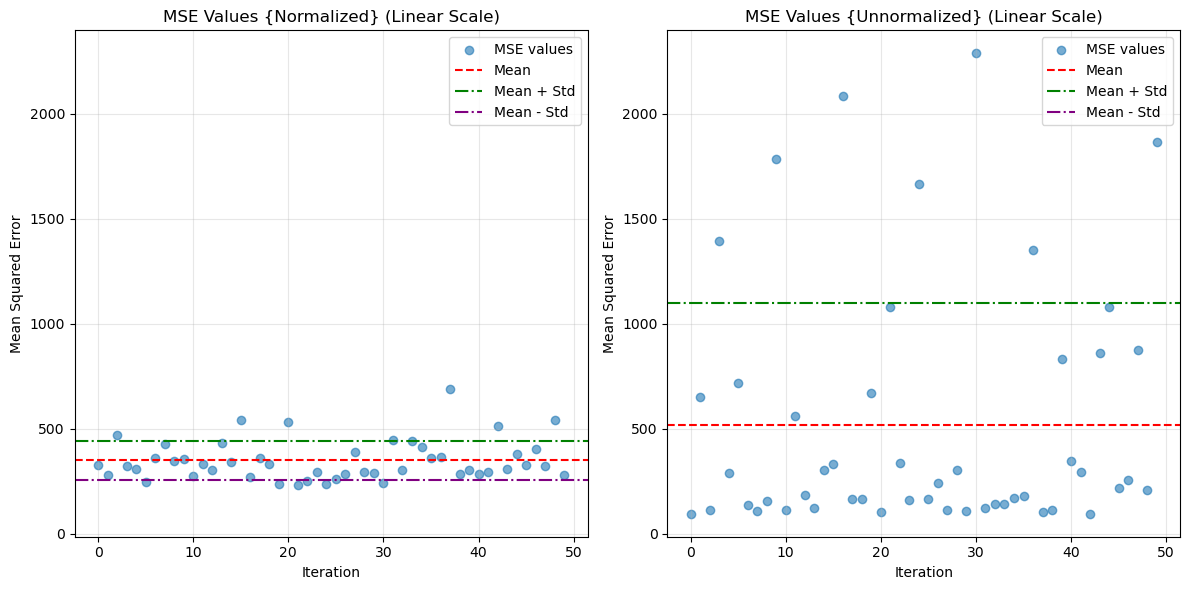

In [245]:
x_values = np.arange(len(mse_normalized))

# Calculate the overall min and max for y-axis
y_min = min(min(mse_normalized), df_mse_unnormalized['mse'].min())
y_max = max(max(mse_normalized), df_mse_unnormalized['mse'].max())

# Add some padding (e.g., 5%) to make sure all elements are visible
padding = (y_max - y_min) * 0.05
y_min = y_min - padding
y_max = y_max + padding

plt.figure(figsize=(12, 6))

# Normalized data plot
plt.subplot(1, 2, 1)
plt.scatter(x_values, mse_normalized, alpha=0.6, label='MSE values')
plt.axhline(y=mean_mse, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_mse + std_mse, color='green', linestyle='-.', label='Mean + Std')
plt.axhline(y=mean_mse - std_mse, color='purple', linestyle='-.', label='Mean - Std')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE Values {Normalized} (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(y_min, y_max)  # Set y-axis limits

# Unnormalized data plot
plt.subplot(1, 2, 2)
plt.scatter(x_values, df_mse_unnormalized['mse'], alpha=0.6, label='MSE values')
plt.axhline(y=mean_mse_unnormalized, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_mse_unnormalized + std_mse_unnormalized, color='green', linestyle='-.', label='Mean + Std')
plt.axhline(y=mean_mse_unnormalized - std_mse_unnormalized, color='purple', linestyle='-.', label='Mean - Std')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE Values {Unnormalized} (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.tight_layout()

### Result

The unnormalized data showed high variability in MSE (std = 581.20) and the mean MSE was 518.46. There were several extreme spikes (>1500) (above scatter plot on the right). And the negative mean-std boundary (518.46 - 581.20 < 0) suggests poor model stability.

After normalization (above scatter plot on the left):
- **`Lower variability in MSE (std = 94.15)`**
- **`Mean MSE of 347.99`**
- Less extreme sprikes (>500)
- **`Better model stability`**.

<div class="alert alert-success">
 This lower variability indicates that normalization helped stabilizing the model's performance.
</div>




